### **Data Preprocessing**

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [34]:
# Datasets
regular = pd.read_csv("Stephen Curry Regularseason Stats.csv")
postseason = pd.read_csv("Stephen Curry Postseason Stats.csv")

print("Regular Season Dataset shape:", regular.shape)
print("Postseason Dataset shape:", postseason.shape)
print("\nRegular Season Columns:", regular.columns.tolist())
print("\nPostseason Columns:", postseason.columns.tolist())

Regular Season Dataset shape: (881, 27)
Postseason Dataset shape: (147, 27)

Regular Season Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

Postseason Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']


In [35]:
# Sorting and Missing values
print("Regular Season Years:", sorted(regular['Season_year'].unique()))
print("Postseason Years:", sorted(postseason['Season_year'].unique()))
print("\nMissing values:")
print("Regular Season:", regular[['Season_year', 'PTS']].isnull().sum())
print("Postseason:", postseason[['Season_year', 'PTS']].isnull().sum())

# Convert points to numeric
regular['PTS'] = pd.to_numeric(regular['PTS'], errors='coerce')
postseason['PTS'] = pd.to_numeric(postseason['PTS'], errors='coerce')

# Regular season statistics
regular_season_stats = regular.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'  
}).round(2)

regular_season_stats.columns = ['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
regular_season_stats = regular_season_stats.reset_index()
regular_season_stats['Season_Type'] = 'Regular Season'

# Postseason statistics
postseason_stats = postseason.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'  
}).round(2)

postseason_stats.columns = ['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
postseason_stats = postseason_stats.reset_index()
postseason_stats['Season_Type'] = 'Postseason'

# Combine datasets
all_season_stats = pd.concat([regular_season_stats, postseason_stats], ignore_index=True)

print("\nRegular Season Statistics:")
print(regular_season_stats)
print("\nPostseason Statistics:")
print(postseason_stats)


Regular Season Years: ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']
Postseason Years: ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2021-2022', '2022-2023']

Missing values:
Regular Season: Season_year    0
PTS            0
dtype: int64
Postseason: Season_year    0
PTS            0
dtype: int64

Regular Season Statistics:
   Season_year  Total_Points    PPG  Games_Played  Avg_Minutes     Season_Type
0    2009-2010          1399  17.49            80        36.19  Regular Season
1    2010-2011          1373  18.55            74        33.68  Regular Season
2    2011-2012           383  15.32            25        29.12  Regular Season
3    2012-2013          1786  22.90            78        38.29  Regular Season
4    2013-2014          1873  24.01            78        36.45  Regular Season
5    2014-2015    

### **Steph Curry Regular Season vs Post Season Points Per Game (PPG) Analysis**


### *Data Exploration Method 1: Descriptive Statistics and Data Exploration*

In [36]:
# Summary statistics
print("Regular Season PPG Summary:")
print(regular_season_stats['PPG'].describe())

print("Postseason PPG Summary:")
print(postseason_stats['PPG'].describe())

# Compare regular vs post
print(f"\nComparison:")
print(f"Regular Season Mean PPG: {regular_season_stats['PPG'].mean():.2f}")
print(f"Postseason Mean PPG: {postseason_stats['PPG'].mean():.2f}")
print(f"Difference: {postseason_stats['PPG'].mean() - regular_season_stats['PPG'].mean():.2f}")

# Descriptive statistics
print(f"\nRegular Season Descriptive Statistics:")
print(f"Median: {regular_season_stats['PPG'].median():.2f}")
print(f"25th Percentile: {regular_season_stats['PPG'].quantile(0.25):.2f}")
print(f"75th Percentile: {regular_season_stats['PPG'].quantile(0.75):.2f}")
print(f"IQR: {regular_season_stats['PPG'].quantile(0.75) - regular_season_stats['PPG'].quantile(0.25):.2f}")

print(f"\nPostseason Descriptive Statistics:")
print(f"Median: {postseason_stats['PPG'].median():.2f}")
print(f"25th Percentile: {postseason_stats['PPG'].quantile(0.25):.2f}")
print(f"75th Percentile: {postseason_stats['PPG'].quantile(0.75):.2f}")
print(f"IQR: {postseason_stats['PPG'].quantile(0.75) - postseason_stats['PPG'].quantile(0.25):.2f}")

Regular Season PPG Summary:
count    14.000000
mean     24.193571
std       4.871365
min      15.320000
25%      21.325000
50%      24.655000
75%      27.042500
max      31.980000
Name: PPG, dtype: float64
Postseason PPG Summary:
count     9.000000
mean     26.601111
std       2.484922
min      23.000000
25%      25.110000
50%      27.360000
75%      28.180000
max      30.460000
Name: PPG, dtype: float64

Comparison:
Regular Season Mean PPG: 24.19
Postseason Mean PPG: 26.60
Difference: 2.41

Regular Season Descriptive Statistics:
Median: 24.66
25th Percentile: 21.32
75th Percentile: 27.04
IQR: 5.72

Postseason Descriptive Statistics:
Median: 27.36
25th Percentile: 25.11
75th Percentile: 28.18
IQR: 3.07


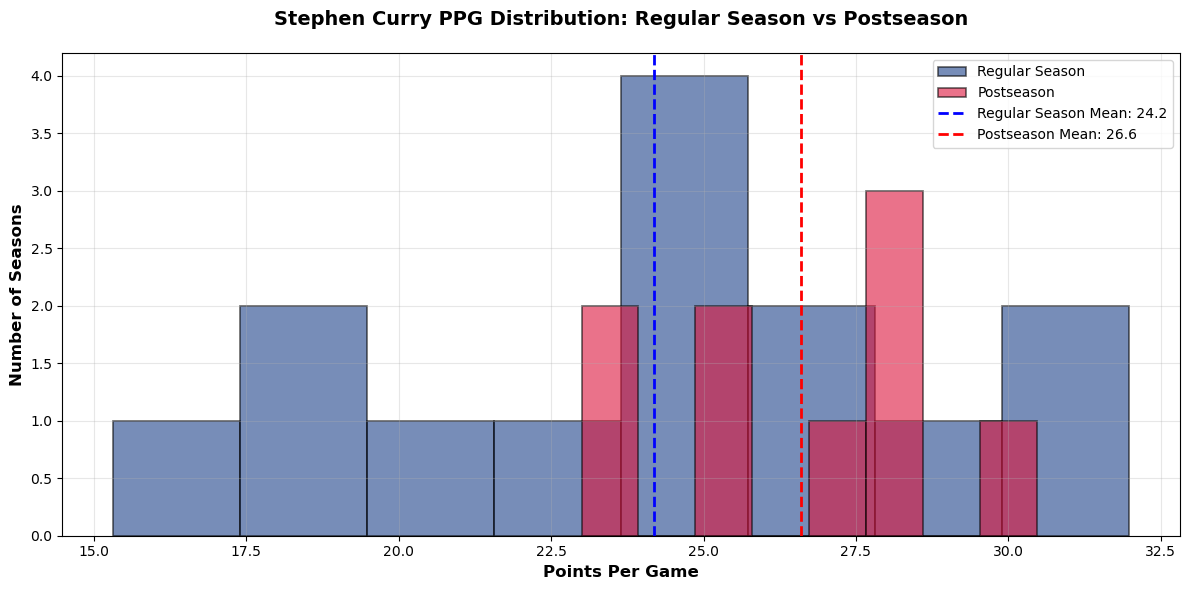

In [37]:
# Combined histogram
plt.figure(figsize=(12, 6))
plt.hist(regular_season_stats['PPG'], bins=8, alpha=0.6, color='#1D428A', label='Regular Season', edgecolor='black', linewidth=1.2)
plt.hist(postseason_stats['PPG'], bins=8, alpha=0.6, color='#DC143C', label='Postseason', edgecolor='black', linewidth=1.2)

# Vertical lines for means
plt.axvline(regular_season_stats['PPG'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Regular Season Mean: {regular_season_stats["PPG"].mean():.1f}')
plt.axvline(postseason_stats['PPG'].mean(), color='red', linestyle='--', linewidth=2, label=f'Postseason Mean: {postseason_stats["PPG"].mean():.1f}')

plt.title("Stephen Curry PPG Distribution: Regular Season vs Postseason", fontsize=14, fontweight='bold', pad=20)
plt.xlabel("Points Per Game", fontsize=12, fontweight='bold')
plt.ylabel("Number of Seasons", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


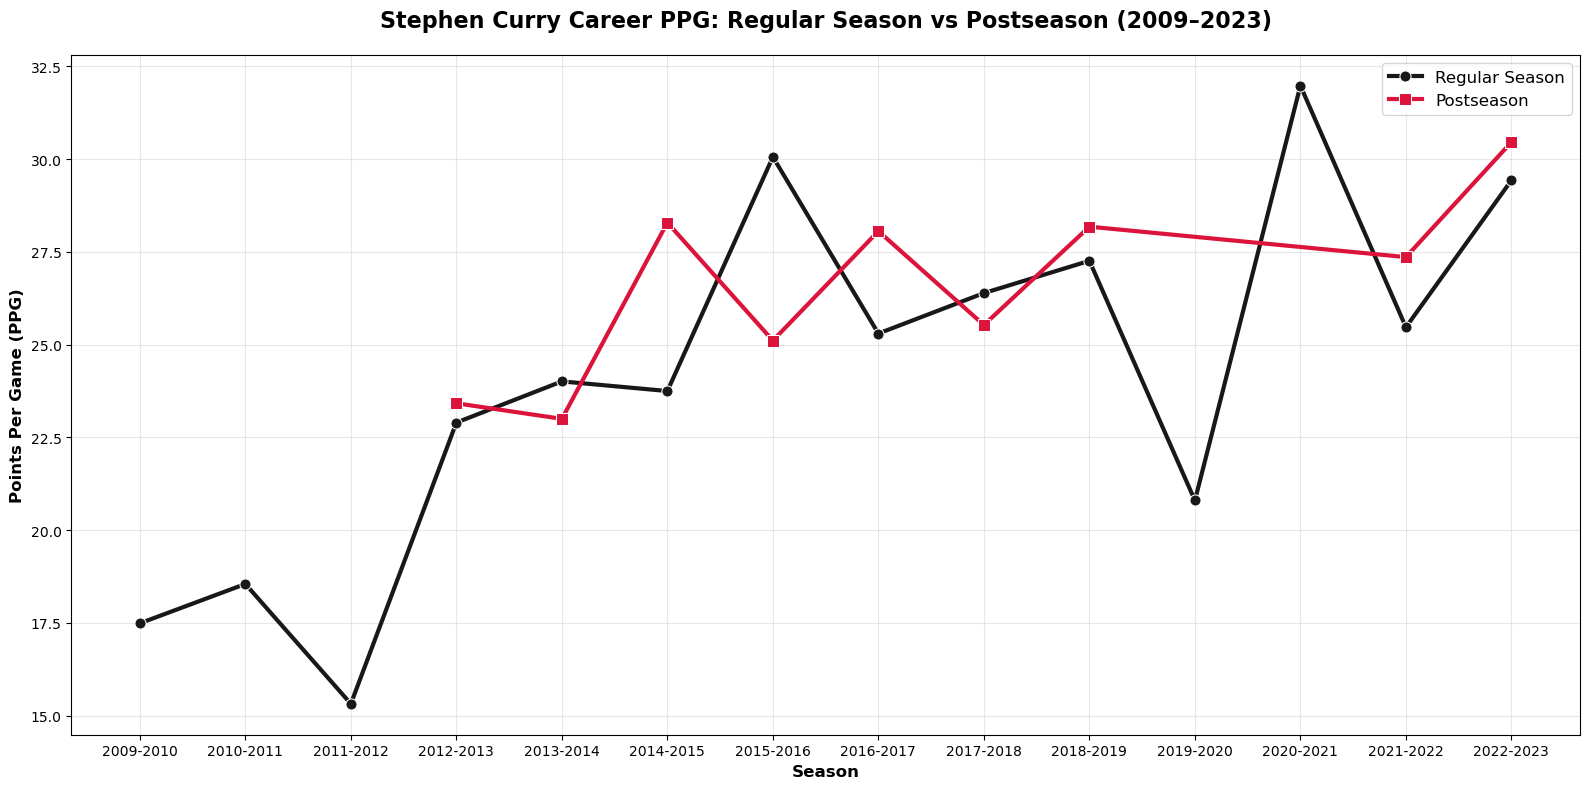

In [38]:
plt.figure(figsize=(16, 8))

# Regular season line
sns.lineplot(data=regular_season_stats, x='Season_year', y='PPG', marker='o', 
             color="#181819", linewidth=3, markersize=8, label='Regular Season')

# Post season line
sns.lineplot(data=postseason_stats, x='Season_year', y='PPG', marker='s', 
             color='#DC143C', linewidth=3, markersize=8, label='Postseason')

# Title and labels
plt.title("Stephen Curry Career PPG: Regular Season vs Postseason (2009–2023)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Conclusion 1**: Stephen Curry's performance shows differences between regular season and postseason play. His regular season PPG has an upward trajectory from his rookie season 15.3 PPG to peak 32.0 PPG in 2020-2021, with a mean of 24.19 PPG and 5.7 IQR. In contrast, his postseason performance shows different patterns, with 26.60 PPG and 3.07 IQR, showing more consistency. The data indicates that Curry's playoff performance exceeds his regular season standards by an average of 2.41 points.

### *Data Exploration Method 2: Hypothesis Testing*

**H0: There is no significant difference between Steph Curry's Regular Season and Postseason PPG.**  
**HA: There is a significant difference between Steph Curry's Regular Season and Postseason PPG.**

In [39]:
regular_ppg = regular_season_stats['PPG']
postseason_ppg = postseason_stats['PPG']

print("Regular Season PPG:", regular_ppg.values)
print("Postseason PPG:", postseason_ppg.values)
print(f"\nRegular Season Mean PPG: {regular_ppg.mean():.2f}")
print(f"Postseason Mean PPG: {postseason_ppg.mean():.2f}")
print(f"Difference: {postseason_ppg.mean() - regular_ppg.mean():.2f}")

# Sample sizes
print(f"\nSample sizes:")
print(f"Regular Season: {len(regular_ppg)}")
print(f"Postseason: {len(postseason_ppg)}")

# Standard deviations
print(f"\nStandard deviations:")
print(f"Regular Season std: {regular_ppg.std():.2f}")
print(f"Postseason std: {postseason_ppg.std():.2f}")

# Two-tailed t-test
t_stat, p_value = stats.ttest_ind(regular_ppg, postseason_ppg)
print(f"Two-tailed p-value: {p_value:.4f}")

Regular Season PPG: [17.49 18.55 15.32 22.9  24.01 23.75 30.06 25.3  26.39 27.26 20.8  31.98
 25.47 29.43]
Postseason PPG: [23.42 23.   28.29 25.11 28.06 25.53 28.18 27.36 30.46]

Regular Season Mean PPG: 24.19
Postseason Mean PPG: 26.60
Difference: 2.41

Sample sizes:
Regular Season: 14
Postseason: 9

Standard deviations:
Regular Season std: 4.87
Postseason std: 2.48
Two-tailed p-value: 0.1867


alpha = 0.05, p = 0.2085
Since p >= alpha, we fail to reject the null hypothesis. There is NO significant evidence that Steph Curry's MVP Seasons' PPG is higher than non-MVP season PPG.

/var/folders/z_/_3t2ytpx17b8wcw_fgbhv8080000gn/T/ipykernel_8171/2996406577.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot([regular_ppg, postseason_ppg],


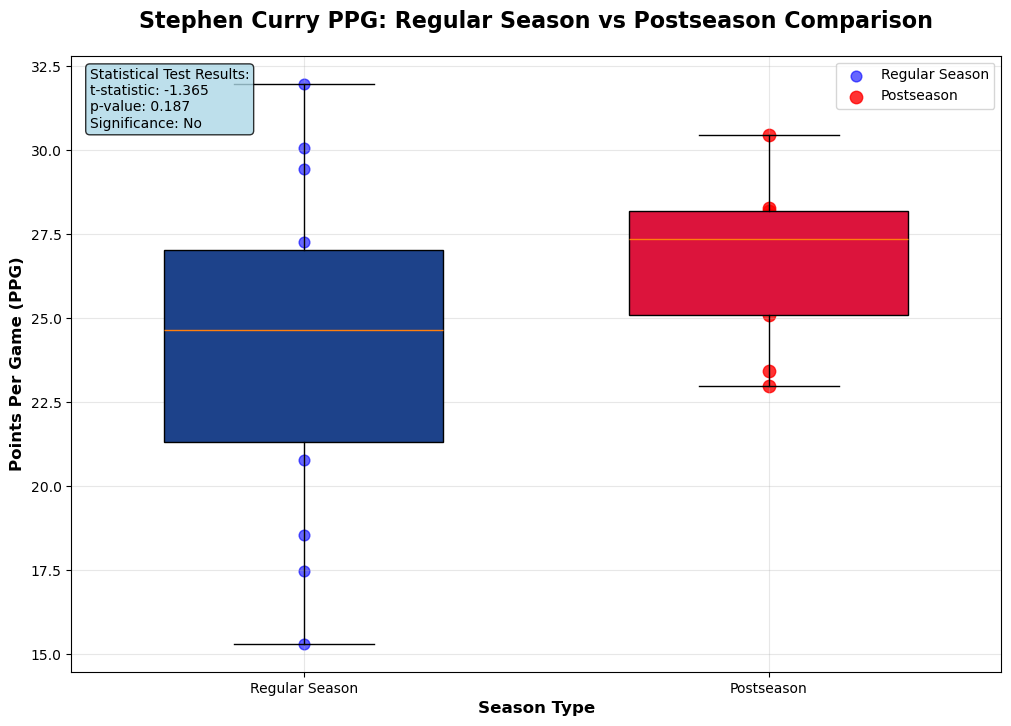

In [40]:
# Box plot comparing Regular Season vs Postseason
plt.figure(figsize=(12, 8))
box_plot = plt.boxplot([regular_ppg, postseason_ppg], 
                      labels=['Regular Season', 'Postseason'],
                      patch_artist=True,
                      widths=0.6)

box_plot['boxes'][0].set_facecolor('#1D428A')  
box_plot['boxes'][1].set_facecolor('#DC143C')

# Points and labels
plt.scatter([1] * len(regular_ppg), regular_ppg, color='blue', alpha=0.6, s=60, label='Regular Season')
plt.scatter([2] * len(postseason_ppg), postseason_ppg, color='red', alpha=0.8, s=80, label='Postseason')

plt.title("Stephen Curry PPG: Regular Season vs Postseason Comparison", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season Type", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend()

# Statistics text
stats_text = f"""Statistical Test Results:
t-statistic: {t_stat:.3f}
p-value: {p_value:.3f}
Significance: {'Yes' if p_value < 0.05 else 'No'}"""

plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.show()


**Conclusion 2:** SInce p (0.187) < alpha (0.05) we fail to reject the null hypothesis, meaning there is no significant difference between Stephen Curry's regular season PPG and post season PPG.

### *Data Exploration Method 3: Correlation/Regression Analysis*

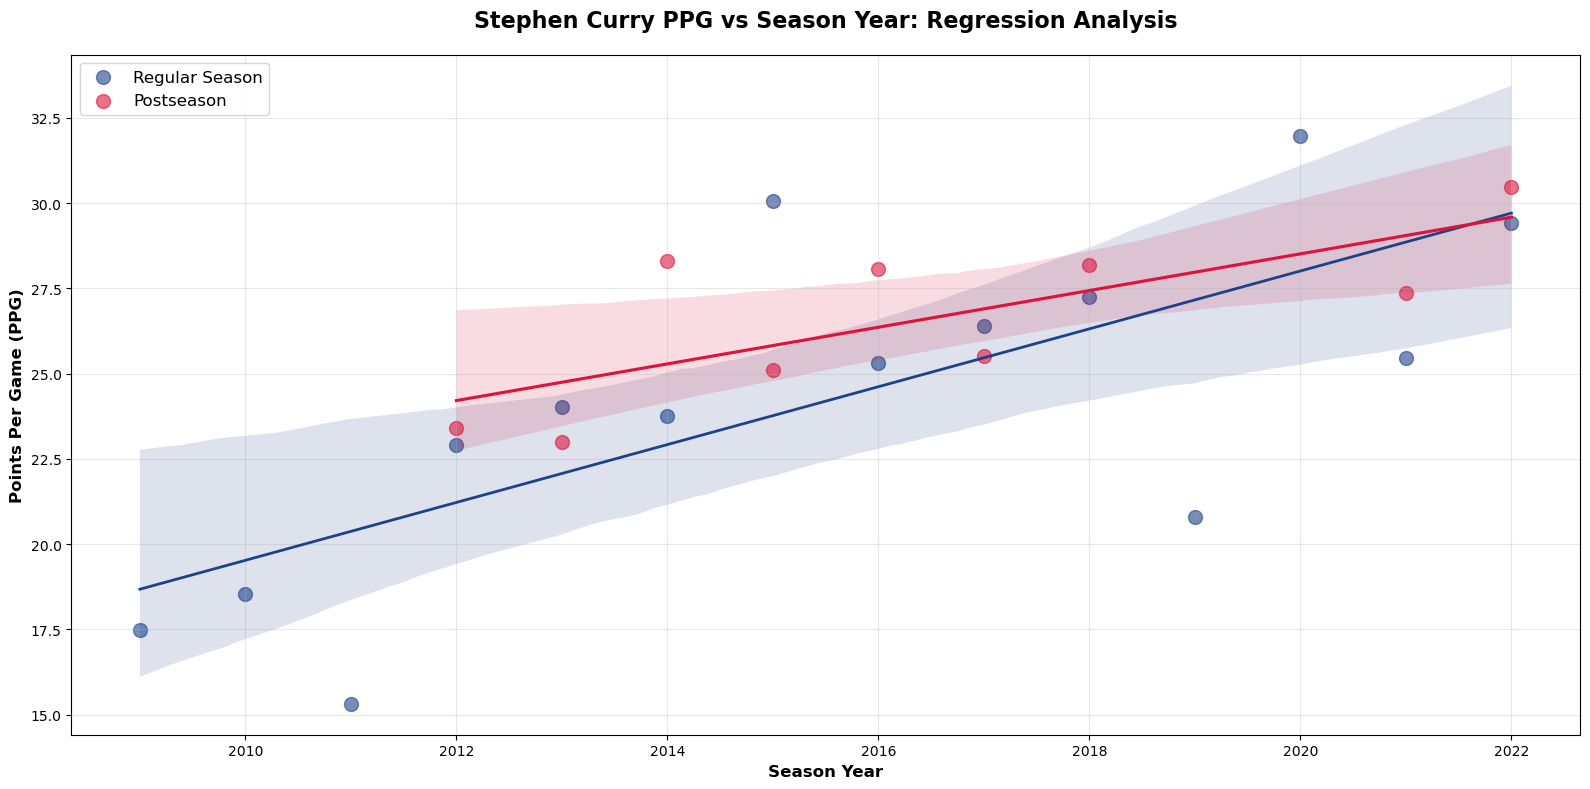

In [41]:
regular_season_stats['Season_numeric'] = regular_season_stats['Season_year'].str[:4].astype(int)
postseason_stats['Season_numeric'] = postseason_stats['Season_year'].str[:4].astype(int)

plt.figure(figsize=(16, 8))

# Regular season scatter + regression
sns.regplot(data=regular_season_stats, x='Season_numeric', y='PPG', 
            scatter_kws={'s': 100, 'alpha': 0.6}, 
            line_kws={'linewidth': 2},
            color='#1D428A', label='Regular Season')

# Post season scatter + regression
sns.regplot(data=postseason_stats, x='Season_numeric', y='PPG', 
            scatter_kws={'s': 100, 'alpha': 0.6, 'marker': 's'}, 
            #line_kws={'linewidth': 2},
            color='#DC143C', label='Postseason')

plt.title("Stephen Curry PPG vs Season Year: Regression Analysis", 
          fontsize=16, fontweight='bold', pad=20)

plt.xlabel("Season Year", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
from scipy.stats import pearsonr

# Calculate for regular season
r_regular, p_regular = pearsonr(regular_season_stats['Season_numeric'], 
                                 regular_season_stats['PPG'])

# Calculate for postseason
r_post, p_post = pearsonr(postseason_stats['Season_numeric'], 
                          postseason_stats['PPG'])

# Print results
print(f"Regular Season: r = {r_regular:.3f}, p-value = {p_regular:.4f}")
print(f"Postseason: r = {r_post:.3f}, p-value = {p_post:.4f}")

Regular Season: r = 0.729, p-value = 0.0031
Postseason: r = 0.743, p-value = 0.0219


The respective scatterplots for the regular and postseason data both show that there is a strong and positive linear relationship between both the regular and postseason years. This means that regardless of post or regular season, Curry's PPG has a strong and upwards trend as his years in the league increased. Additionally, the p-values measured here corroborate this conclusion because since the p-values are less than 0.05, we reject the null hypothesis which in this case is "years in the league has no effect on Curry's PPG".

In conclusion, regardless of whether it is regular or postseason, Curry's PPG increases as the years go on.

In [43]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(
    regular_season_stats['Season_numeric'], 
    regular_season_stats['PPG'])

r_squared = r_value**2
print(f"R² = {r_squared:.3f}")

R² = 0.531


The R^2 value shows that 49% of the variation in PPG is explained by year while the other 51% is due to other factors. Other factors in this context could be injuries, role changes, team matchups etc.